## Mount Google Drive


In [10]:
from google.colab import drive

drive.mount('/content/drive')
%cd /content/drive/My Drive/PoliMi Dropouts/HW1/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1LiKa5Z0BCIu0jusx0TdUVxt-_4yXGOhC/PoliMi Dropouts/HW1


In [33]:
!pip install keras-cv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 24.5 MB/s eta 0:00:00


## Import libraries

In [34]:
import numpy as np

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
from tensorflow.keras.utils import to_categorical

import keras_cv
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

import seaborn as sns

import matplotlib.pyplot as plt

from datetime import datetime
import hashlib

seed = 42

np.random.seed(42)
tf.random.set_seed(42);

## Load the dataset

In [22]:
data = np.load("Dataset/training_set.npz")

In [23]:
X = data['images']
y = to_categorical(data['labels'], num_classes = 8)
print(X.shape)
print(y.shape)

(13759, 96, 96, 3)
(13759, 8)


## Display class distribution


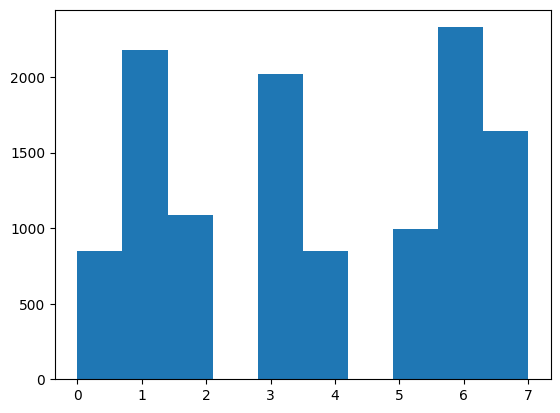

In [14]:
plt.hist(np.argmax(y, axis = -1))
plt.show()

## Data exploration to find duplicates and potential outliers

### Data Visualization

Keys in .npz file: ['images', 'labels']
Visualizing images 11960 to 11979.


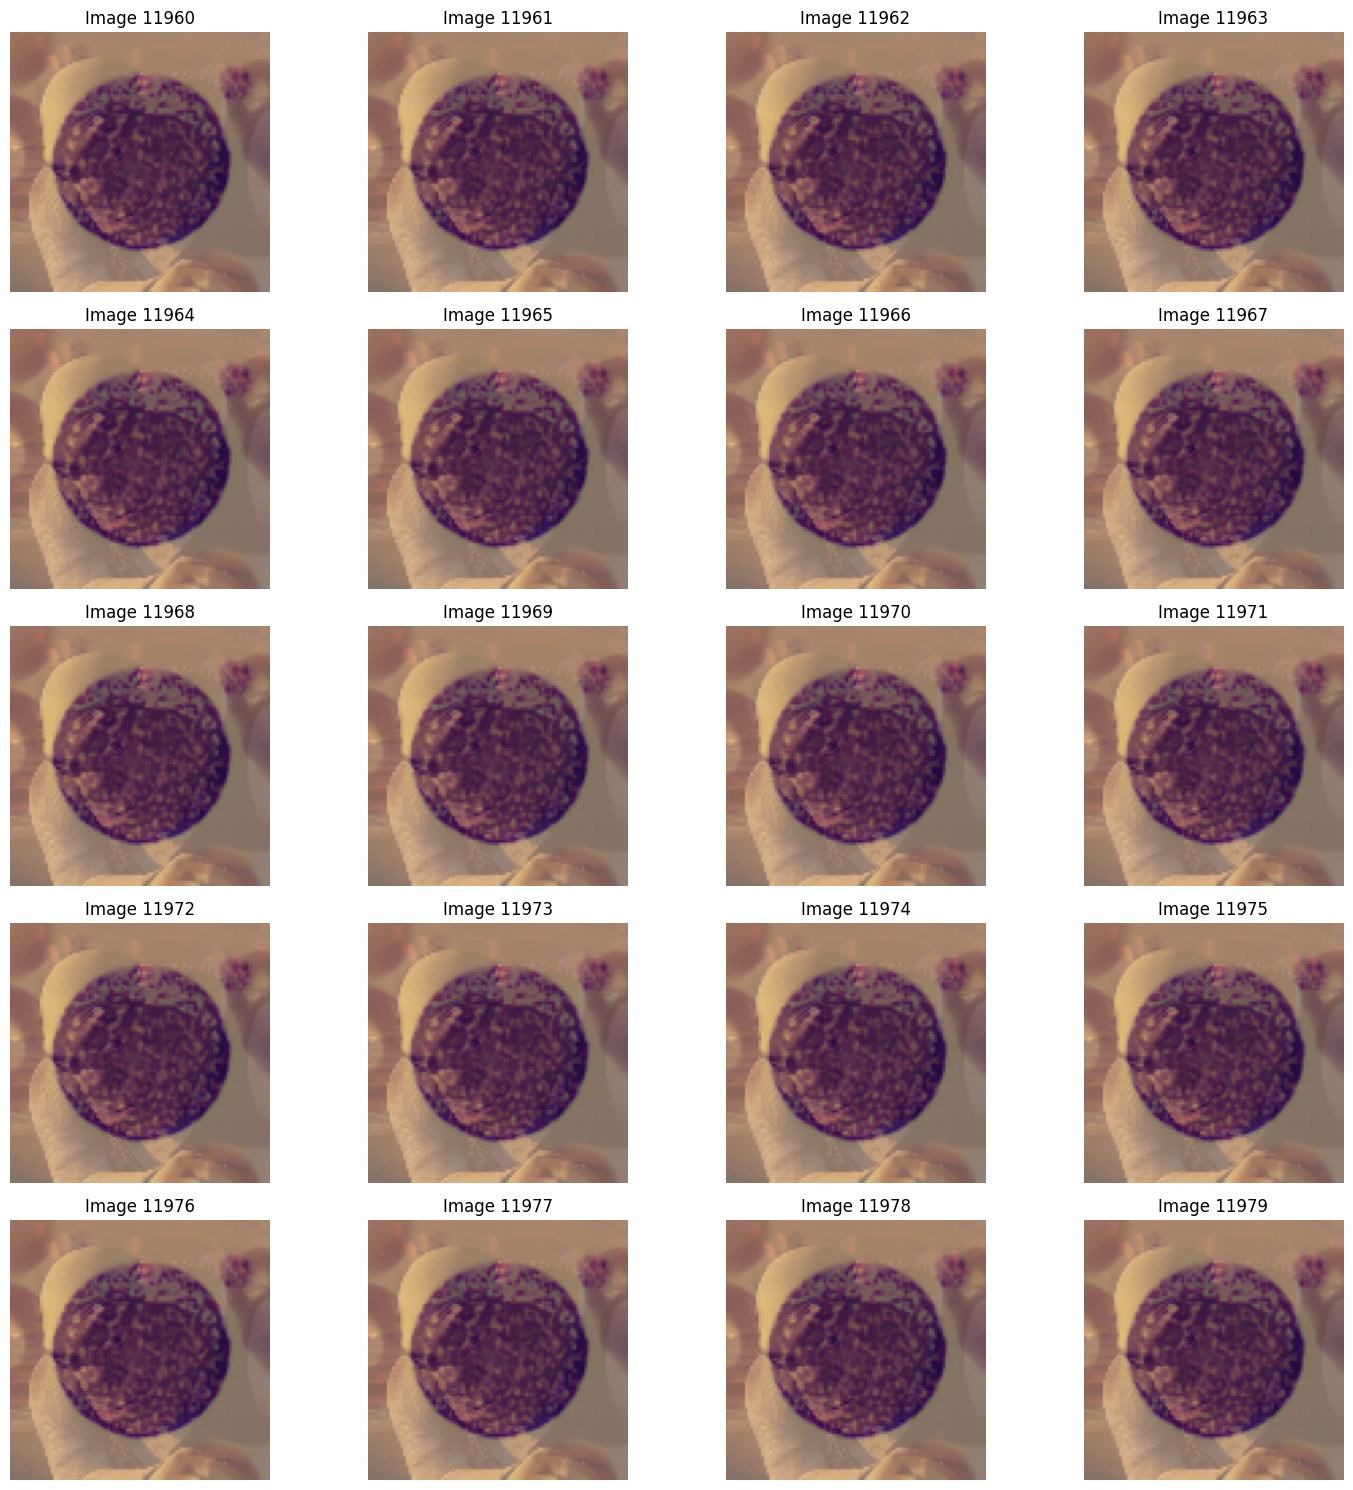

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_npz_images(npz_file_path, start_index=0, end_index=20):
    """
    Visualize a specified range of images from a .npz file.

    Parameters:
    - npz_file_path (str): Path to the .npz file.
    - start_index (int): Starting index of images to visualize.
    - end_index (int): Ending index of images to visualize (exclusive).
    """
    # Load the .npz file
    data = np.load(npz_file_path)

    # Check the keys in the .npz file
    print("Keys in .npz file:", data.files)

    # Assuming there's only one key and it's named 'images', modify if needed
    images = data[data.files[0]]

    # Check if the range is valid
    if start_index < 0 or end_index > len(images) or start_index >= end_index:
        print("Invalid range specified.")
        return

    # Get the specified range of images
    range_images = images[start_index:end_index]
    print(f"Visualizing images {start_index} to {end_index - 1}.")

    # Create a figure
    plt.figure(figsize=(15, 15))

    # Display images in the specified range
    for idx, img in enumerate(range_images):
        plt.subplot(5, 4, idx + 1)  # Display in a 5x4 grid
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(f"Image {start_index + idx}")

    # Show the figure
    plt.tight_layout()
    plt.show()

# Example usage
visualize_npz_images('Dataset/training_set.npz', start_index=11960, end_index=11980)


### Data Pre-Processing

In [27]:
def find_identical_images_optimized(npz_file_path):
    # Load the .npz file
    data = np.load(npz_file_path)

    # Assuming images and labels are arrays in the .npz file
    images = data['images']
    labels = data['labels']  # Add any additional arrays you may need

    # Dictionary to store hashes and their indices
    hash_dict = {}
    duplicate_count = {}
    indices_to_remove = set()

    # Function to calculate hash of an image
    def compute_hash(image):
        return hashlib.md5(image.tobytes()).hexdigest()

    # Print the number of images in the set
    print("Total images:", len(images))

    # Loop through all images and compute the hash
    for idx, img in enumerate(images):
        img_hash = compute_hash(img)

        # Check if hash is already in the dictionary
        if img_hash in hash_dict:
            original_idx = hash_dict[img_hash]
            duplicate_count[original_idx] = duplicate_count.get(original_idx, 0) + 1
            indices_to_remove.add(idx)

            # If there are two duplicates, add the original for removal as well
            if duplicate_count[original_idx] >= 2:
                indices_to_remove.add(original_idx)
        else:
            # Otherwise, store the hash and index as original
            hash_dict[img_hash] = idx

    # Remove duplicates and optionally the original
    if indices_to_remove:
        print("Removing identical images at indices:", sorted(indices_to_remove))
        images = np.delete(images, list(indices_to_remove), axis=0)
        labels = np.delete(labels, list(indices_to_remove), axis=0)  # Apply to labels as well
    else:
        print("No identical images found.")

    # Save the new set without duplicates
    np.savez('training_set_no_duplicates.npz', images=images, labels=labels)  # Include all arrays


find_identical_images_optimized('Dataset/training_set.npz')

Total images: 13759
Removing identical images at indices: [3440, 4761, 9084, 10734, 11026, 11566, 11575, 11856, 11959, 11960, 11961, 11962, 11963, 11964, 11965, 11966, 11967, 11968, 11969, 11970, 11971, 11972, 11973, 11974, 11975, 11976, 11977, 11978, 11979, 11980, 11981, 11982, 11983, 11984, 11985, 11986, 11987, 11988, 11989, 11990, 11991, 11992, 11993, 11994, 11995, 11996, 11997, 11998, 11999, 12000, 12001, 12002, 12003, 12004, 12005, 12006, 12007, 12008, 12009, 12010, 12011, 12012, 12013, 12014, 12015, 12016, 12017, 12018, 12019, 12020, 12021, 12022, 12023, 12024, 12025, 12026, 12027, 12028, 12029, 12030, 12031, 12032, 12033, 12034, 12035, 12036, 12037, 12038, 12039, 12040, 12041, 12042, 12043, 12044, 12045, 12046, 12047, 12048, 12049, 12050, 12051, 12052, 12053, 12054, 12055, 12056, 12057, 12058, 12059, 12060, 12061, 12062, 12063, 12064, 12065, 12066, 12067, 12068, 12069, 12070, 12071, 12072, 12073, 12074, 12075, 12076, 12077, 12078, 12079, 12080, 12081, 12082, 12083, 12084, 12085,

## Load Data

In [29]:
data = np.load("Dataset/training_set_no_duplicates.npz")
X = data['images']
y = to_categorical(data['labels'], num_classes = 8)
print(X.shape)
print(y.shape)

(11951, 96, 96, 3)
(11951, 8)


## Checking visualization again

Keys in .npz file: ['images', 'labels']
Visualizing images 11931 to 11950.


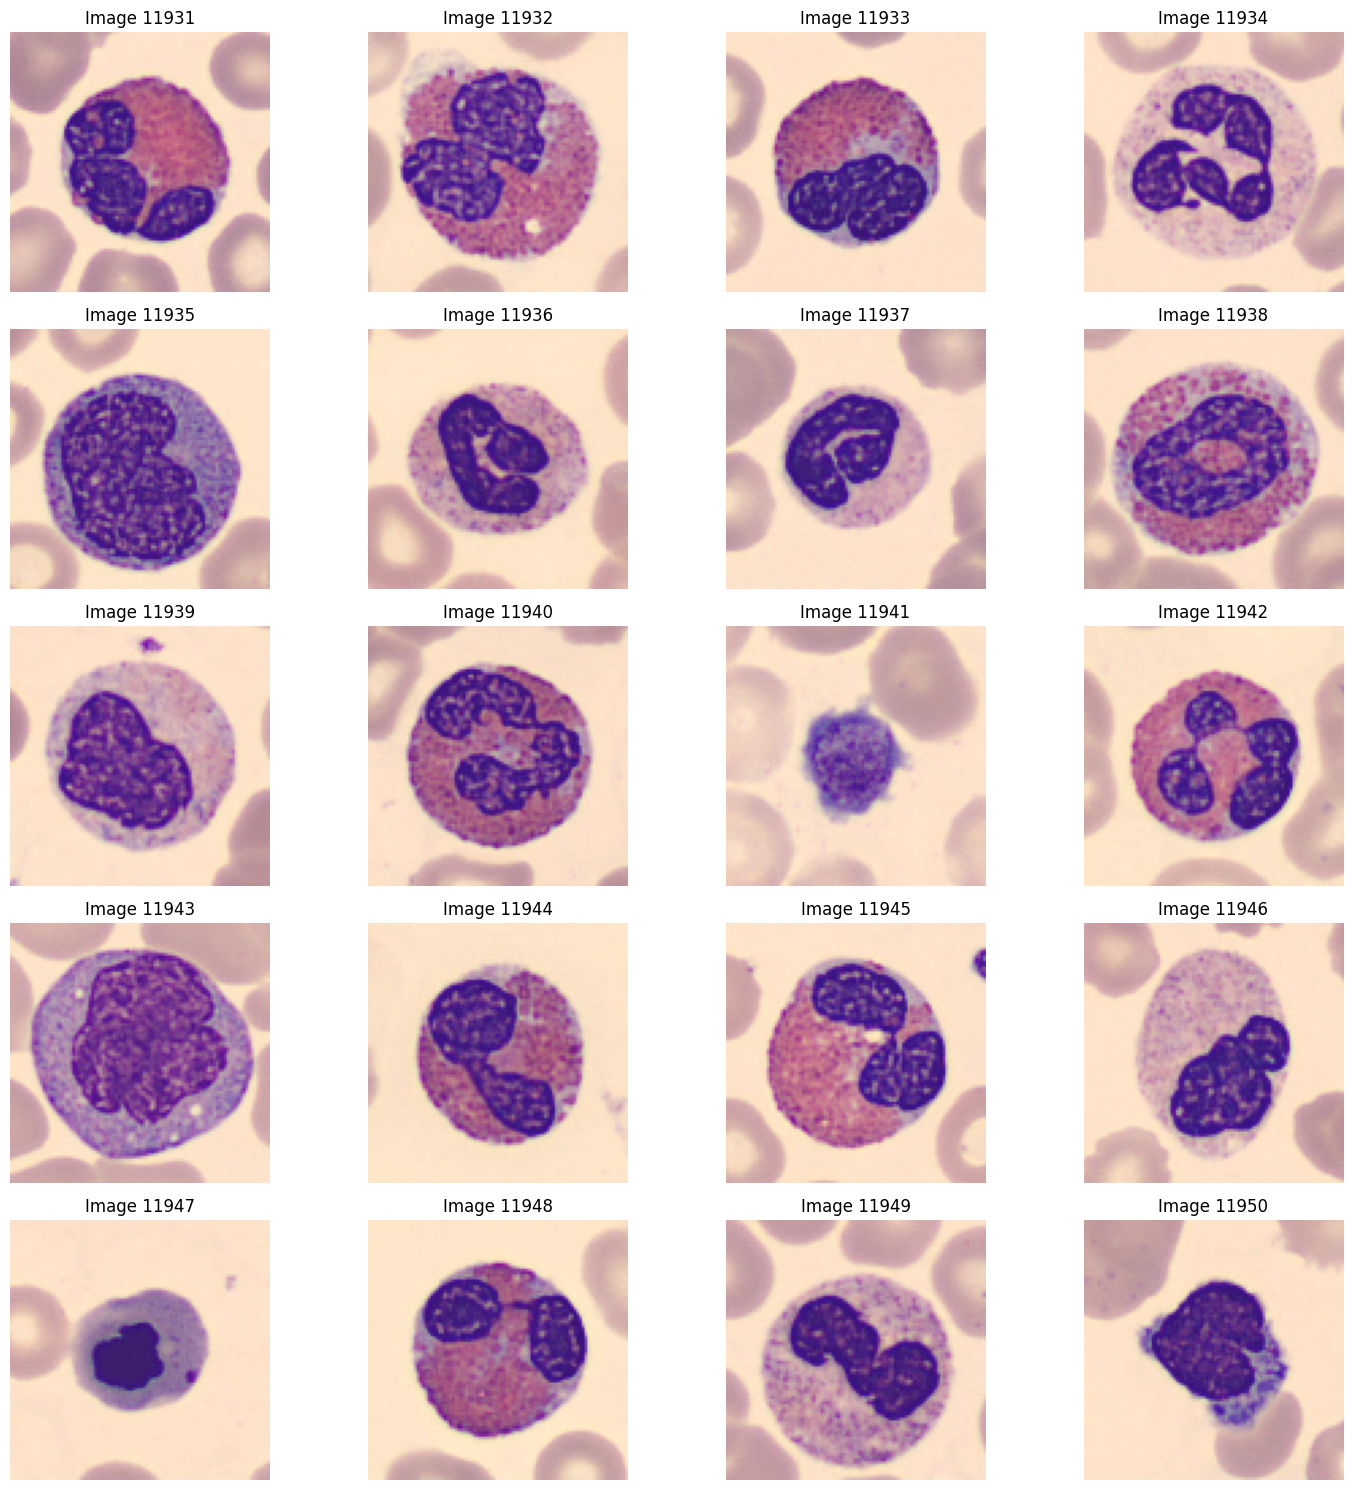

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_npz_images(npz_file_path, start_index=0, end_index=20):
    """
    Visualize a specified range of images from a .npz file.

    Parameters:
    - npz_file_path (str): Path to the .npz file.
    - start_index (int): Starting index of images to visualize.
    - end_index (int): Ending index of images to visualize (exclusive).
    """
    # Load the .npz file
    data = np.load(npz_file_path)

    # Check the keys in the .npz file
    print("Keys in .npz file:", data.files)

    # Assuming there's only one key and it's named 'images', modify if needed
    images = data[data.files[0]]

    # Check if the range is valid
    if start_index < 0 or end_index > len(images) or start_index >= end_index:
        print("Invalid range specified.")
        return

    # Get the specified range of images
    range_images = images[start_index:end_index]
    print(f"Visualizing images {start_index} to {end_index - 1}.")

    # Create a figure
    plt.figure(figsize=(15, 15))

    # Display images in the specified range
    for idx, img in enumerate(range_images):
        plt.subplot(5, 4, idx + 1)  # Display in a 5x4 grid
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(f"Image {start_index + idx}")

    # Show the figure
    plt.tight_layout()
    plt.show()

# Example usage
visualize_npz_images('Dataset/training_set_no_duplicates.npz', start_index=11931, end_index=11951)


## Split the dataset in Training and Test set

In [35]:
y = to_categorical(data['labels'], num_classes = 8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=seed, stratify=y)
X_test_copy = X_test.copy()
y_test_copy = y_test.copy()


## Final Augmentation: used to save a dataset already augmented for easier faster training, once converged to the best augmentation found

In [ ]:
# Ottieni la policy standard di RandAugment
policy_layers = keras_cv.layers.RandAugment.get_standard_policy(
    value_range=(0, 255),
    magnitude=0.30,
    magnitude_stddev=0.3,
)

#layer da rimuovere da policy
layers_to_remove = (
    keras_cv.layers.RandomContrast,
    keras_cv.layers.RandomColorDegeneration,
    keras_cv.layers.RandomBrightness
)

filtered_layers = [
    layer for layer in policy_layers
    if not isinstance(layer, layers_to_remove)
]

all_layers = filtered_layers + [tf.keras.layers.GaussianNoise(0.3),
                               keras_cv.layers.RandomCutout(0.1, 0.1),
                               keras_cv.layers.RandomSaturation(0.3),
                               keras_cv.layers.RandomSharpness(0.3, [0, 255]),
                               keras_cv.layers.RandomContrast(factor=0.65, value_range=(0, 255)),
                               keras_cv.layers.RandomBrightness(0.5)]


#Definisci la pipeline completa di augmentazione
augmentation = tf.keras.Sequential([
    keras_cv.layers.RandomAugmentationPipeline(
        layers = all_layers,
        augmentations_per_image=4,  # Numero di trasformazioni da applicare per immagine
        rate=0.7   # Probabilità di applicare ciascuna trasformazione
    ),
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(1),
    tf.keras.layers.RandomContrast(0.25),
    tf.keras.layers.RandomBrightness(0.2)
], name='Augmentation')

In [37]:
def augment_data(X_train, y_train, augmentation):

    # Moltiplicatore per il numero di immagini per ogni classe
    multiplier = 4

    # Liste per contenere immagini e etichette aumentate
    augmented_X = []
    augmented_y = []

    # Ciclo su tutte le classi
    for class_label in range(y_train.shape[1]):

        # Trova gli indici della classe corrente (assumendo che y_train sia one-hot encoded)
        class_indices = np.where(y_train[:, class_label] == 1)[0]
        X_class = X_train[class_indices]

        # Numero di immagini originali per la classe corrente
        original_count = len(X_class)

        # Calcola il numero di immagini aumentate necessarie
        target_samples = original_count * multiplier
        n_needed = target_samples - original_count

        if n_needed <= 0:
            continue  # Salta se la classe ha già abbastanza immagini

        # Genera immagini aumentate in batch
        batch_size = 32  # Puoi modificare il batch size se necessario
        num_batches = n_needed // batch_size + (n_needed % batch_size > 0)

        for _ in tqdm(range(num_batches)):
        # Seleziona immagini casuali della classe corrente per il batch di aumento
            idxs = np.random.choice(len(X_class), size=min(batch_size, n_needed))
            img_batch = X_class[idxs]

        # Applica augmentation all'intero batch
            img_augmented_batch = augmentation(tf.convert_to_tensor(img_batch))
            augmented_X.extend(img_augmented_batch.numpy())  # Aggiunge batch di immagini alla lista
            augmented_y.extend([class_label] * len(img_batch))  # Aggiunge le etichette corrispondenti

        # Riduce n_needed di batch_size per evitare campioni extra
            n_needed -= len(img_batch)

            if n_needed <= 0:
                break  # Ferma se si raggiunge il numero target

# Converte le liste di dati aumentati in array numpy
    augmented_X = np.array(augmented_X, dtype=np.float32)  # Assicura compatibilità float32 per input del modello
    augmented_y = np.array(augmented_y, dtype=int)  # Assicura tipo intero per le etichette

# Converte augmented_y in formato one-hot encoding
    augmented_y_one_hot = np.zeros((len(augmented_y), y_train.shape[1]))
    augmented_y_one_hot[np.arange(len(augmented_y)), augmented_y] = 1

# Concatena dati originali e aumentati
    X_train = np.concatenate((X_train, augmented_X), axis=0)
    y_train = np.concatenate((y_train, augmented_y_one_hot), axis=0)

    print(f"New training set size: {X_train.shape}, {y_train.shape}")
    return X_train, y_train


In [ ]:

X_train_augmented, y_train_augmented = augment_data(X_train, y_train, augmentation)
X_test_augmented, y_test_augmented = augment_data(X_test, y_test, augmentation)

 99%|█████████▉| 130/131 [03:40<00:01,  1.70s/it]


### Saving a dataset with a training and test split that can be used for TTA purposes

In [ ]:
# Save the split and augmented dataset
np.savez('Dataset/augmented_split_dataset.npz',
         X_train=X_train_augmented, X_test=X_test_copy,
         y_train=y_train_augmented, y_test=y_test_copy)

del X_train
del y_train
del X_test
del y_test

### Saving a full dataset of augmented images to use for faster training

In [ ]:
# Now do the same without split
X_augmented = np.concatenate([X_train_augmented, X_test_augmented])
y_augmented = np.concatenate([y_train_augmented, y_test_augmented])

# Save the augmented dataset without split
np.savez('Dataset/augmented_dataset.npz', X=X_augmented, y=y_augmented)